In [1]:
library('tidyverse')
library('scales')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
df = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-16/recent-grads.csv', col_types = cols())

In [16]:
df_majors_grouped = df %>% 
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Arts') %>% 
mutate(category = 'Humanities')

df_majors_grouped2 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Communications & Journalism' ) %>%
mutate(category = 'Humanities')

df_majors_grouped3 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Humanities & Liberal Arts' ) %>%
mutate(category = 'Humanities')

df_majors_grouped4 = df%>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Industrial Arts & Consumer Services' ) %>%
mutate(category = 'Professional')

df_majors_grouped5 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Interdisciplinary' ) %>%
mutate(category = 'Humanities')

df_majors_grouped6 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Biology & Life Science' ) %>%
mutate(category = 'STEM')

df_majors_grouped7 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Computers & Mathematics' ) %>%
mutate(category = 'STEM')

df_majors_grouped8 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Physical Sciences' ) %>%
mutate(category = 'STEM')

df_majors_grouped9 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Engineering' ) %>%
mutate(category = 'STEM')

df_majors_grouped10 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Psychology & Social Work' ) %>%
mutate(category = 'Social Sciences')

df_majors_grouped11 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Law & Public Policy' ) %>%
mutate(category = 'Social Sciences')

df_majors_grouped12 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Social Science' ) %>%
mutate(category = 'Social Sciences')

df_majors_grouped12 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Social Science' ) %>%
mutate(category = 'Social Sciences')

df_majors_grouped13 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Education' ) %>%
mutate(category = 'Professional')

df_majors_grouped14 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Business' ) %>%
mutate(category = 'Professional')


df_majors_grouped15 = df %>%
select(Major_category, ShareWomen, Median) %>%
filter(Major_category == 'Health' ) %>%
mutate(category = 'Professional')



df_majors = df_majors_grouped %>% 
full_join(df_majors_grouped2) %>%
full_join(df_majors_grouped3) %>% 
full_join(df_majors_grouped4) %>% 
full_join(df_majors_grouped5) %>% 
full_join(df_majors_grouped6) %>% 
full_join(df_majors_grouped7) %>%
full_join(df_majors_grouped8) %>% 
full_join(df_majors_grouped9) %>% 
full_join(df_majors_grouped10)%>% 
full_join(df_majors_grouped11)%>%
full_join(df_majors_grouped12)%>%
full_join(df_majors_grouped13)%>%
full_join(df_majors_grouped14)%>%
full_join(df_majors_grouped15)

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")

Joining, by = c("Major_category", "ShareWomen", "Median", "category")



Warning message:
“Removed 1 rows containing missing values (geom_point).”


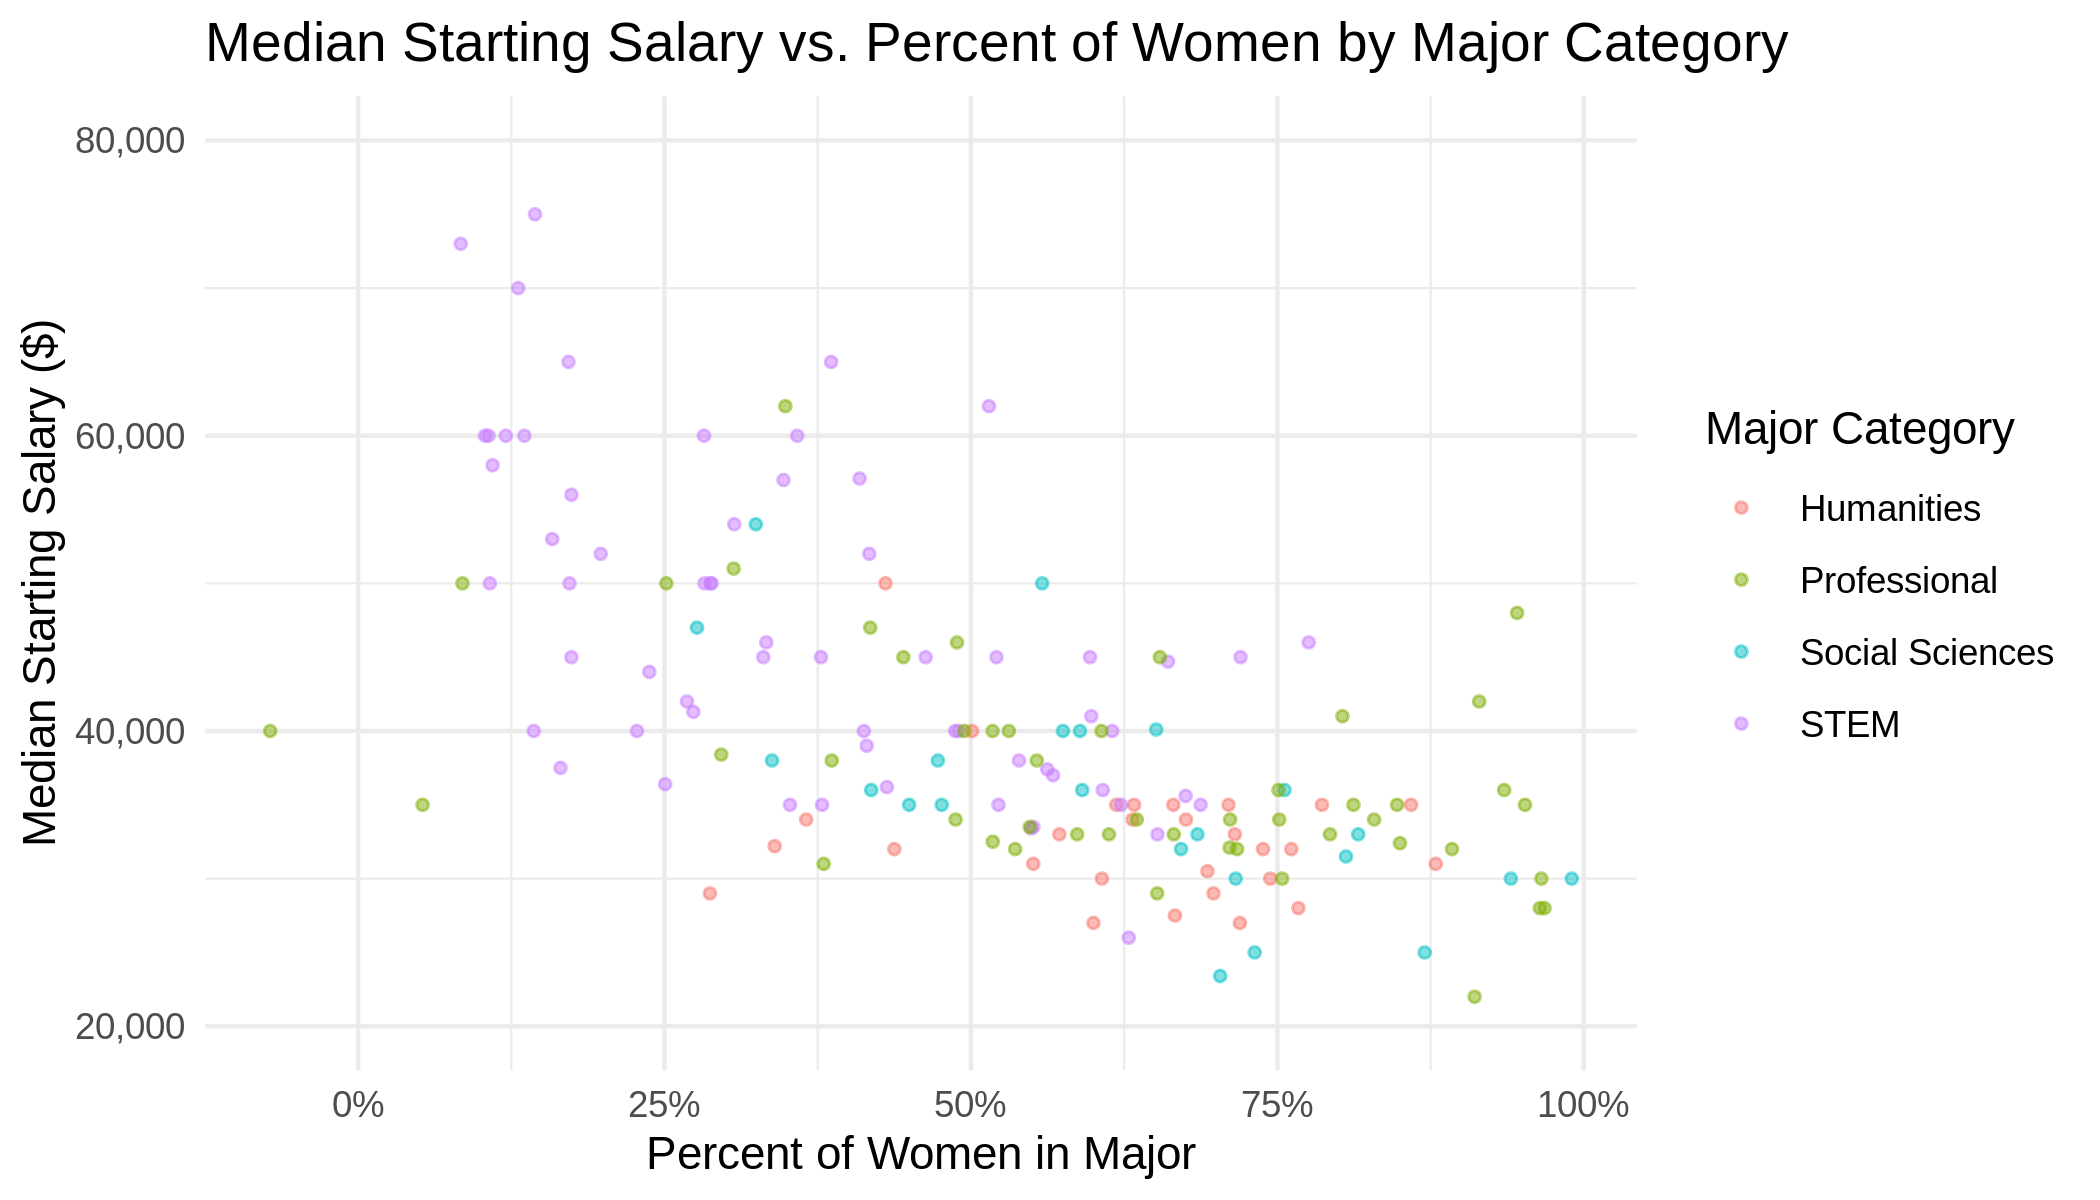

In [4]:
options(repr.plot.width=7, repr.plot.height=4, repr.plot.res=300)
p = ggplot(df_majors, aes(y = Median, x = ShareWomen, color = category)) +
geom_point(alpha = 0.5, position = position_jitter(h = 0, w = 0.10), size = 1) +
theme_minimal() +
scale_y_continuous(labels = comma, limits = c(20000, 80000))+
scale_x_continuous(labels = percent_format(accuracy = 1))+
xlab('Percent of Women in Major')+
ylab('Median Starting Salary ($)')+
ggtitle('Median Starting Salary vs. Percent of Women by Major Category')+
guides(color = guide_legend(title = "Major Category"))

p

In [14]:
income = df_majors %>% 
group_by(category) %>%
summarize(mean_income = mean(Median)) %>%
arrange(mean_income) %>%
mutate(category = category %>% fct_inorder())

In [13]:
gender = df_majors %>% 
group_by(category) %>%
summarize(mean_women = mean(ShareWomen)) %>%
arrange(mean_women) %>%
mutate(category = category %>% fct_inorder() %>% fct_rev() %>% fct_relevel('Humanities', after = 0))

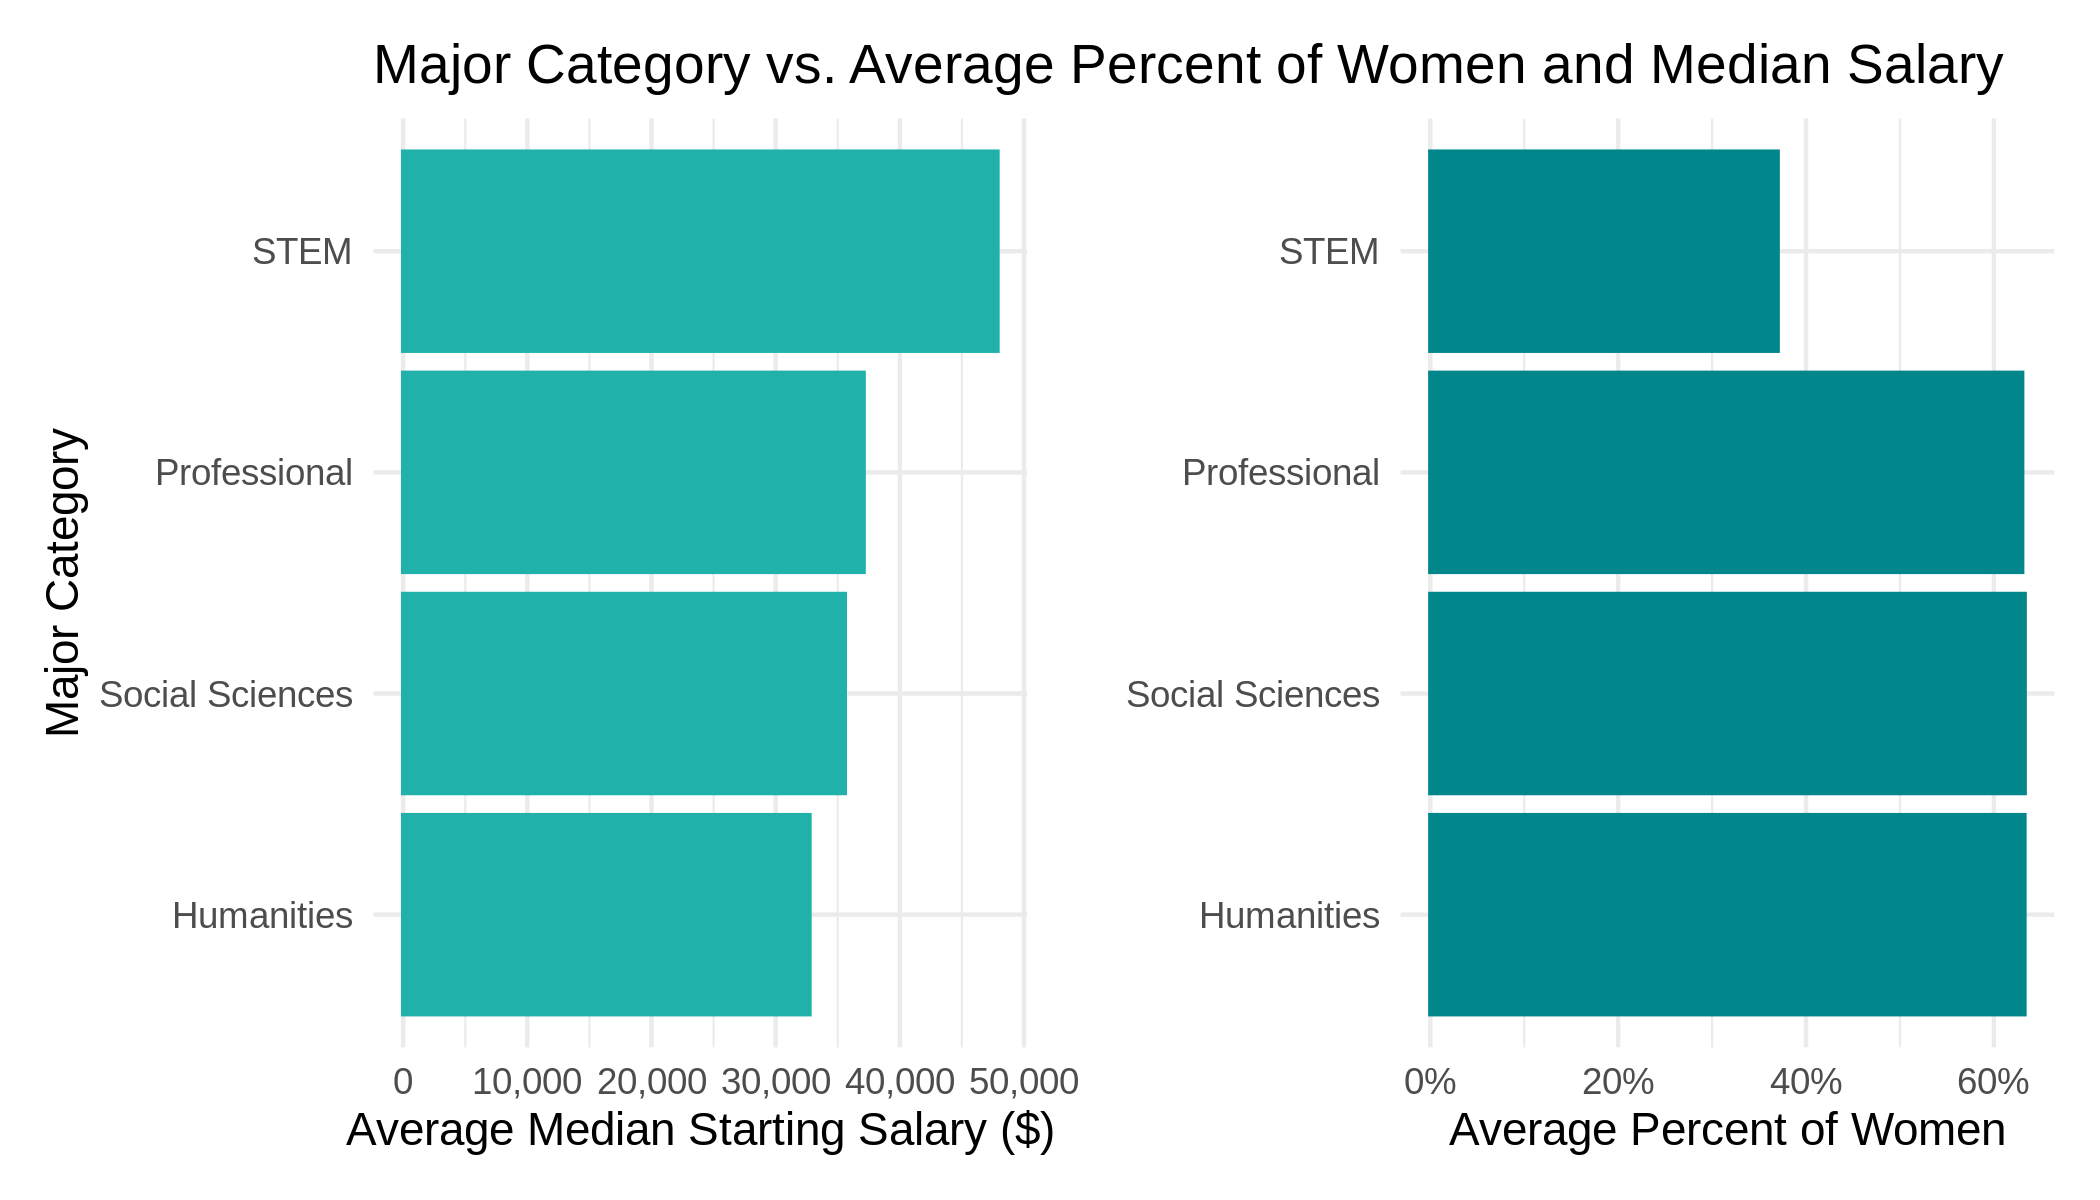

In [9]:
library('patchwork')

p = ggplot(income, aes(x = mean_income, y = category)) +
geom_col(color = 'lightseagreen', fill = 'lightseagreen') +

theme_minimal()+
scale_x_continuous(labels = comma)+
xlab('Average Median Starting Salary ($)')+
ylab('Major Category')+
ggtitle('Major Category vs. Average Percent of Women and Median Salary')

p2 = ggplot(gender, aes(x = mean_women, y = category)) +
geom_col(color = 'turquoise4', fill = 'turquoise4') +
theme_minimal()+
scale_x_continuous(labels = percent_format(accuracy = 1))+
xlab('Average Percent of Women')+
ylab('')


p + p2

Above are two visuals: a scatter plot and two bar charts plotted side by side showing the correlation between the median starting salary of a college major and the percent of women in that major. Each major has been grouped into four categories which are represented by the color on the plot and the bars on each bar chart: humanities, professional, social sciences, and STEM. The scatter plot shows that there is a negative correlation between median starting salary and percentage of women in a major. Both visuals show that those with the highest-salaried jobs are STEM majors, which subsequently have low percentages of women. Professional majors or majors in the humanities and social sciences have nearly equal average percentages of women, and their jobs have lower starting salaries than STEM majors. Humanities majors having the lowest starting salaries. Professional majors have more of an even distribution throughout the plot, so these majors have a variable starting salary and percentage of women. Yet, they still have the second highest average median income. This chart reveals one of the potential reasons why the gender pay gap exists: women may be choosing majors with lower median starting salaries than men.  

In [10]:
df_part_time_prop = df %>% 
mutate(part_time_prop = Part_time/(Part_time + Full_time))

In [11]:
df_lowest_xx = df_part_time_prop %>% 
filter(ShareWomen < 0.1) %>%
summarize(mean_part_time_prop = mean(part_time_prop))%>%
mutate(Women_prop = '0 to 10%') 

df_lowerer_xx = df_part_time_prop %>% 
filter(ShareWomen > 0.1, ShareWomen < 0.2) %>%
summarize(mean_part_time_prop = mean(part_time_prop))%>%
mutate(Women_prop = '10 to 20%') 

df_lower_xx = df_part_time_prop %>% 
filter(ShareWomen > 0.2, ShareWomen < 0.3) %>%
summarize(mean_part_time_prop = mean(part_time_prop))%>%
mutate(Women_prop = '20 to 30%') 

df_loww_xx = df_part_time_prop %>% 
filter(ShareWomen > 0.3, ShareWomen < 0.4) %>%
summarize(mean_part_time_prop = mean(part_time_prop))%>%
mutate(Women_prop = '30 to 40%') 

df_low_xx = df_part_time_prop %>% 
filter(ShareWomen > 0.4, ShareWomen < 0.5) %>%
summarize(mean_part_time_prop = mean(part_time_prop))%>%
mutate(Women_prop = '40 to 50%') 

df_medium_xx = df_part_time_prop %>% 
filter(ShareWomen > 0.4, ShareWomen < 0.60) %>%
summarize(mean_part_time_prop = mean(part_time_prop))%>%
mutate(Women_prop = '40 to 60%')

df_high_xx = df_part_time_prop %>% 
filter(ShareWomen > 0.6, ShareWomen < 0.80) %>%
summarize(mean_part_time_prop = mean(part_time_prop))%>%
mutate(Women_prop = '60 to 80%')

df_highest_xx = df_part_time_prop %>% 
filter(ShareWomen > 0.8) %>%
summarize(mean_part_time_prop = mean(part_time_prop))%>%
mutate(Women_prop = '80 to 100%') 

df2 = df_lowest_xx %>% 
full_join(df_lower_xx) %>%
full_join(df_lowerer_xx )%>%
full_join(df_loww_xx )%>%
full_join(df_low_xx) %>% 
full_join(df_medium_xx) %>% 
full_join(df_high_xx) %>% 
full_join(df_highest_xx)

df2 %>% print

Joining, by = c("mean_part_time_prop", "Women_prop")

Joining, by = c("mean_part_time_prop", "Women_prop")

Joining, by = c("mean_part_time_prop", "Women_prop")

Joining, by = c("mean_part_time_prop", "Women_prop")

Joining, by = c("mean_part_time_prop", "Women_prop")

Joining, by = c("mean_part_time_prop", "Women_prop")

Joining, by = c("mean_part_time_prop", "Women_prop")



# A tibble: 8 × 2
  mean_part_time_prop Women_prop
                <dbl> <chr>     
1              0.0521 0 to 10%  
2              0.179  20 to 30% 
3              0.166  10 to 20% 
4              0.234  30 to 40% 
5              0.247  40 to 50% 
6              0.269  40 to 60% 
7              0.296  60 to 80% 
8              0.275  80 to 100%


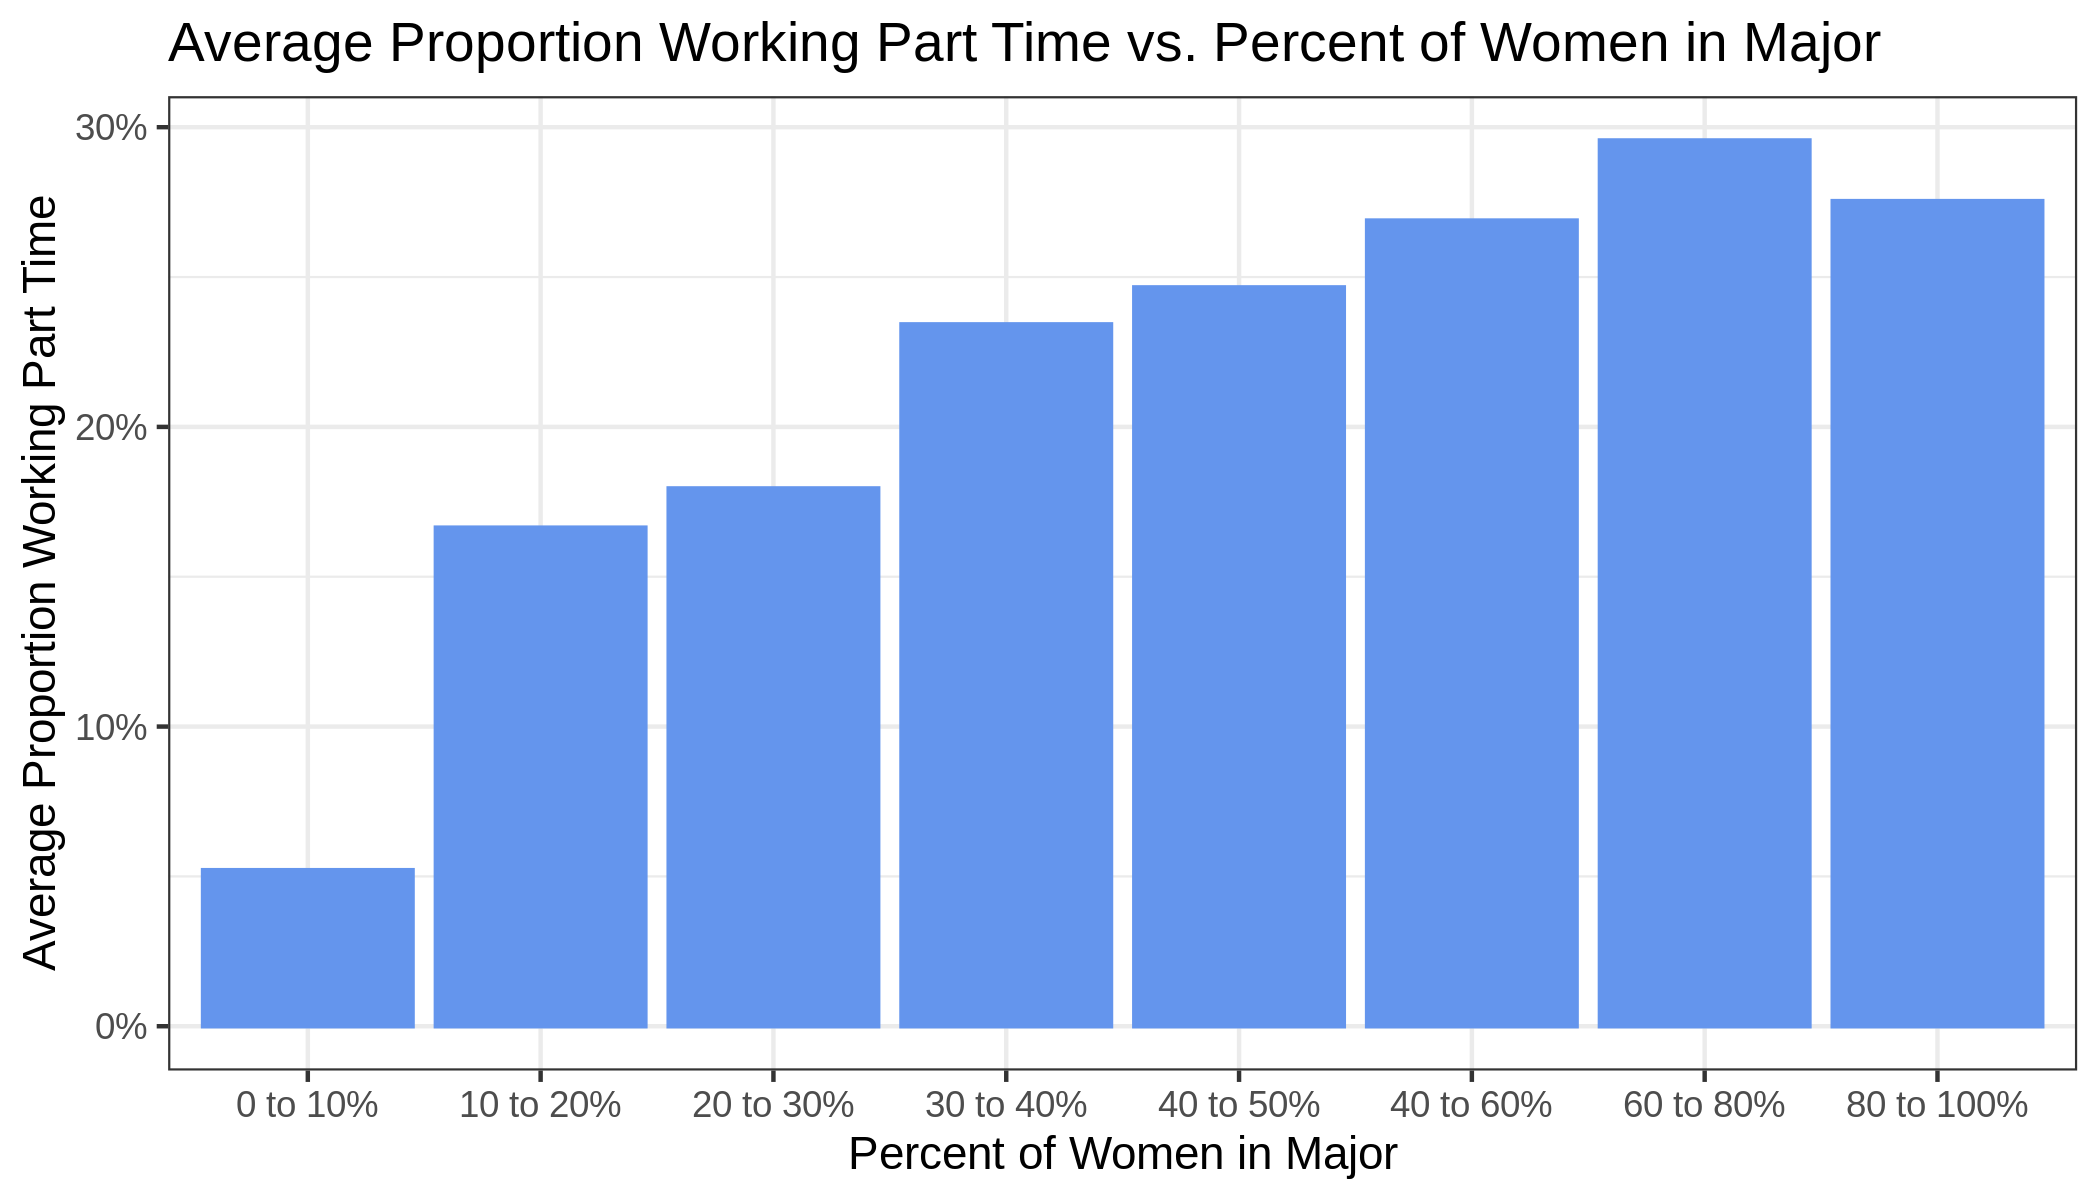

In [12]:
p = ggplot(df2, aes(y = mean_part_time_prop, x = Women_prop)) +
geom_col(color = 'cornflowerblue', fill = 'cornflowerblue') +
theme_bw() +
scale_y_continuous(labels = percent_format(accuracy = 1))+
xlab('Percent of Women in Major')+
ylab('Average Proportion Working Part Time')+
ggtitle('Average Proportion Working Part Time vs. Percent of Women in Major')

p

Above is a bar graph showing the average percent of graduates of a particular major working part time vs. the percent of women in that major. As the percentage of women in a major increases, the average percentage of people in that major working part time also increases. When there's less than 10 percent of women in a major, the average percent working part-time is remarkably low: these majors with the lowest percent of women have a third of average percent of graduates working part time compared to the majors with 10 to 20 percent women. They also have nearly a sixth of the average percent of people working part time compared to the majors with the highest percentages of women. This proves that male-dominated fields are composed of more full time workers than fields with higher proportions of women. This chart reveals another reason why the gender pay gap may exist: women may be working part time more often than their male counterparts. This could slows a woman's upward progress in their career, causing them to have jobs with lower salaries than men.